#Daily Questions

1. [DFS](#scrollTo=_9VFYdOVUbPi)
2. [BFS]()
3. [Binary Search](#scrollTo=ZWrQW3lwZix1)
4. [Sliding Window](#scrollTo=qrmtRnhXZpHi)
5. [Recursion](#scrollTo=Dvt_GrnM7HLe)
6. [LinkedList](#scrollTo=LktDsRybGArE)
7. [BackTrack](#scrollTo=jRDYkaJTl3Yh)
8. [Sorting](#scrollTo=Q6uoCQXDqWL6)- (1051. Height Checker)
9. [Dynamic Programming]()




##DFS
563. Binary Tree Tilt

Given the root of a binary tree, return the sum of every tree node's tilt.

The tilt of a tree node is the absolute difference between the sum of all left subtree node values and all right subtree node values. If a node does not have a left child, then the sum of the left subtree node values is treated as 0. The rule is similar if the node does not have a right child.
https://leetcode.com/problems/binary-tree-tilt/description/

---
* 100. Same Tree ❌
* 111. Minimum Depth of Binary Tree ❌
* Tilt ❌




In [ ]:
from typing import Optional

class TreeNode:
  def __init__(self, val=0, left=None, right=None):
      self.val = val
      self.left = left
      self.right = right
class SolutionBST:
   def maxDiameter(self, root):
    depth= 0
    def maxDepth(node):
        nonlocal depth
        if not node:
            return 0

        left = maxDepth(node.left)
        right = maxDepth(node.right)
        depth = max(depth, left+right)

        return 1 + max(left , right)
    maxDepth(root)
    return depth


sol = SolutionBST()
# root1 = TreeNode(1, (TreeNode( 2)), TreeNode(3) )
# root2 = TreeNode(1, (TreeNode( 2)), TreeNode(3) )
root = TreeNode(4, (TreeNode( 2, TreeNode(3), TreeNode(5)) ) , (TreeNode(9, None, TreeNode(7))) ) #15
print(sol.maxDiameter(root))

4


##BFS

In [ ]:
from collections import deque
class TreeNode:
  def __init__(self, val=0, left=None, right=None):
      self.val = val
      self.left = left
      self.right = right
class BFSSolution:
    def level_order_sum(self, root: TreeNode):
      # Your code goes here
      if not root:
          return []
      result = []
      queue = deque([root])

      while queue:
          level_sz = len(queue)
          # cur_level = []
          sum = 0
          for _ in range(level_sz):
              cur_node = queue.popleft()
              # cur_level.append(cur_node.val)
              sum+=cur_node.val

              if cur_node.left:
                  queue.append(cur_node.left)
              if cur_node.right:
                  queue.append(cur_node.right)
          result.append(sum)
      return result

sol = BFSSolution()
# root1 = TreeNode(1, (TreeNode( 2)), TreeNode(3) )
# root2 = TreeNode(1, (TreeNode( 2)), TreeNode(3) )
root = TreeNode(4, (TreeNode( 2, TreeNode(3), TreeNode(5)) ) , (TreeNode(9, None, TreeNode(7))) ) #[4, 11, 15]
print(sol.level_order_sum(root))

[4, 11, 15]


##Binary Search

In [ ]:
#Binary
def bSearch(array, target) -> int:
  array.sort()
  print(f'sorted - ', array)
  left, right = 0, len(array) - 1

  while( left <= right):
    mid = (left + right) // 2
    if array[mid] == target:
      return mid
    elif target < array[mid]:
      right = mid - 1
    elif target > array[mid]:
      left = mid + 1
  return -1


print(bSearch([3,4,6,7,2,1,5],10))

sorted -  [1, 2, 3, 4, 5, 6, 7]
-1


##Sliding Window
1763. Longest Nice Substring

**Question**:
2760. Longest Even Odd Subarray With Threshold
https://leetcode.com/problems/longest-even-odd-subarray-with-threshold/submissions/1273671794/

----
Try divisorSubstrings-**2269**. Later

In [ ]:
from typing import List
class SlideWindow:
  def longestAlternatingSubarray(self, nums: List[int], threshold: int) -> int:
    longSub, l, r = 0, 0, 0

    while l < len(nums):
      # given condition - 1 and 3
      if nums[l] % 2 == 0 and nums[l] <= threshold:
        curLen =1
        r = l
        # check if next elements satify conditions 2,3
        # if yes increase lenght of cur arr
        while r + 1 < len(nums) and nums[r]<= threshold and nums[r+1]<= threshold and nums[r]%2 != nums[r+1]%2:
          r+=1
          curLen+=1
        longSub = max(curLen, longSub)
        l = r + 1
      else:
        l += 1
    return longSub


sol = SlideWindow()
print("Slide Window: ")
print("Long Sub Array - ", sol.longestAlternatingSubarray([3,2,5,4], 5))

Slide Window: 
Long Sub Array -  3


##Linked List

203. Remove Linked List Elements


In [ ]:
from typing import Optional
class ListNode:
  def __init__(self, val=0, next=None):
    self.val = val
    self.next = next

class SolutionLinkedList:
  def removeElements(self, head: Optional[ListNode], val: int) -> Optional[ListNode]:
    if not head:
      return None

    temp = ListNode()
    temp.next = head
    cur = temp

    while cur.next:
      if cur.next.val == val:
        cur.next = cur.next.next
      else:
        cur = cur.next

    return temp.next

# Example usage
head = ListNode(1,
       ListNode(2,
       ListNode(6,
       ListNode(3,
       ListNode(4,
       ListNode(5,
       ListNode(6)))))))



solution = SolutionLinkedList()
new_head = solution.removeElements(head, 6)
while new_head:
  print(new_head.val)
  new_head = new_head.next

1
2
3
4
5


##Recursion

Given a linked list, swap every two adjacent nodes and return its head. You must solve the problem without modifying the values in the list's nodes (i.e., only nodes themselves may be changed.)


---
Recursion approach:

In [ ]:
from typing import Optional
class ListNode2:
  def __init__(self, val=0, next=None):
    self.val = val
    self.next = next

class RecurSolutionLinkedList:
  # check for name ListNode use ListNode2
  def swapPairs(self, head: Optional[ListNode2])-> Optional[ListNode2]:
    if not head:
      return None
    elif not head.next:
      return head
    else:
      temp = head.next
      head.next = self.swapPairs(head.next.next)
      temp.next = head

    return temp

'''
1,2,3,4 -> 2,1,4,3

function call |swap(1)                | swap(3)       |  swap(None)   |
base case     |                       |               |  return None  |

temp =        | 2                     | 4             |               |
head.next =   |4 <-3                  | None <- None  |               |
wait until above function returns the result
temp.next =   | 1                     | 3             |               |

return temp   | 2->1->4->3->None      | 4->3 -> None  | None          |
4 -> 3

2 -> 1

'''



# Example usage
head = ListNode2(1)
head.next = ListNode2(2)
head.next.next = ListNode2(3)
head.next.next.next = ListNode2(4)

solution = RecurSolutionLinkedList()
new_head = solution.swapPairs(head)
while new_head:
  print(new_head.val)
  new_head = new_head.next

2
1
4
3


##BackTracking

In [ ]:
from typing import List
class Solution:
    def letterCombinations(self, digits: str) -> List[str]:
      res = []
      if len(digits) == 0 or digits==None: return res
      digitToChar = {
          "2" : "abc",
          "3" : "def",
          "4" : "ghi",
          "5" : "jkl",
          "6" : "mno",
          "7" : "pqrs",
          "8" : "tuv",
          "9" : "wxyz",
      }

      def backtrack(idx, curStr):
        if len(curStr) == len(digits):
          res.append(curStr)
          return

        for c in digitToChar[digits[idx]]:
          backtrack(idx + 1, curStr+c)

      if digits:
        backtrack(0, "")
      return res


sol = Solution()
print(sol.letterCombinations("23"))

['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']


##Sorting

merge Sort

In [ ]:
def merge(arr1,arr2):
  res = []
  left, right  =  0, 0

  while left < len(arr1) and right < len(arr2):
    if arr1[left] <= arr2[right]:
      res.append(arr1[left])
      left+=1
    else:
      res.append(arr2[right])
      right+=1
  # add remaining elements
  while left < len(arr1):
    res.append(arr1[left])
    left+=1
  while right < len(arr2):
    res.append(arr2[right])
    right+=1
  return res



def merge_sort(arr):
  if len(arr) == 1:
    return arr
  pivot = len(arr)//2
  left = merge_sort(arr[:pivot])
  right = merge_sort(arr[pivot:len(arr)])
  return merge(left, right)


def sorting():
  arr = [4,3,2,1,5,7,6]
  print(merge_sort(arr))
sorting()

[1, 2, 3, 4, 5, 6, 7]


## Dynamic Programming

You are climbing a staircase. It takes n steps to reach the top.

Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?

In [3]:
class Solution:
    dp = {}

    def climbStairs(self, n: int) -> int:
        if n in self.dp:
            return self.dp[n]
        if n == 1:
            return 1
        if n == 2:
            return 2
        one = self.climbStairs(n - 1)
        two = self.climbStairs(n - 2)
        total = one + two
        self.dp[n] = total
        return total
Sol = Solution()
print(Sol.climbStairs(3))

3


# Warm Up - Easy

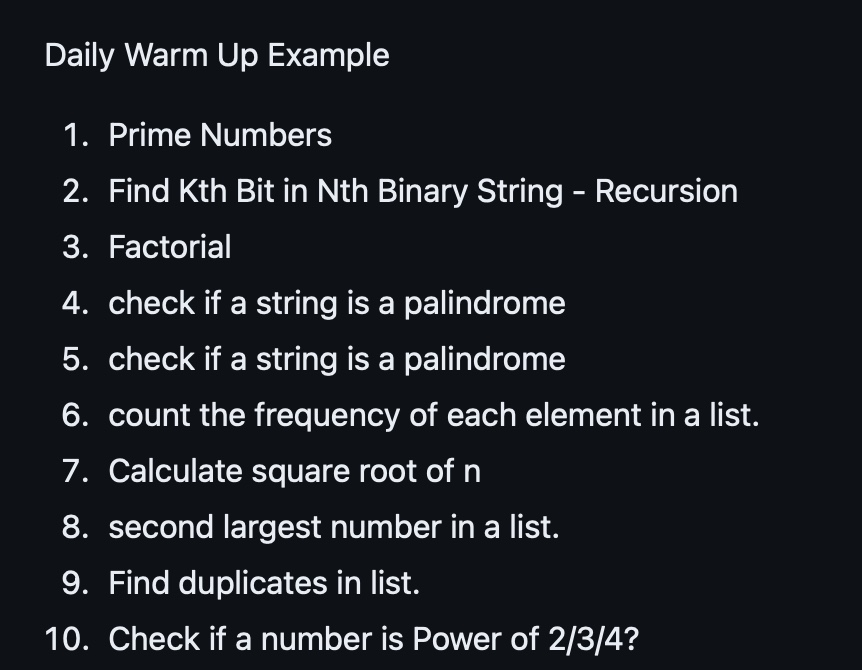

In [ ]:
#factorial
cache = {}
def fact(num):
  if num in cache:
    return cache[num]
  elif num == 1:
    return 1
  else:
    result = num * fact(num - 1)
    cache[num] = result
    return result



def main():
  num = int(input("Enter n to get factorial: "))
  print('Factorial of',num,'is: ',fact(num))

main()

Enter n to get factorial: 1
Factorial of 1 is:  1



 N prime numbers
def prime(n):
  prime = []

  for i in range(1,n-1):
    is_prime = True
    for j in range(2, int(i/2)+1):
      if i % j == 0:
        is_prime = False
        break
    if is_prime:
      prime.append(i)
  return prime




def main():
  n = int(input('Enter num to print prime numbers: '))
  print('Prime numbers upto: ', n ,' : ', prime(n))


main()

In [ ]:
# square root of n
# 4 -> 2, 16 -> 4, 25 -> 5

def squareRootBasic(num):
  for d in range(2,int(num/2) ):
    if d*d == num:
      return d
  return -1

def squareRootBinary(num):
  left = 1
  right = num // 2

  while left < right:
    mid = (left + right) // 2
    if mid * mid == num:
      return mid
    elif ( num < mid*mid ):
      right = mid - 1
    else:
      left = mid + 1
      num = mid

  return num


def main():
  num = 11
  result = squareRootBasic(num)
  print('Basic only returns if n has square root else -1: ')
  print('\tSquare root of,',num,'is :',result)
  print('Check next for squareroot of any provided number')
  result2 = squareRootBinary(num)
  print(result2)


main()

Basic only returns if n has square root else -1: 
	Square root of, 11 is : -1
Check next for squareroot of any provided number
3


In [ ]:
#check if string is palindrome
def pali(str):
  first = 0
  last = len(str)-1
  pali = True
  while first < last:
    if str[first] != str[last]:
      return False
    first+=1
    last-=1
  return True



def main():
  str = 'saaS'
  print('Given string is plaindrome: ',pali(str))


main()

Given string is plaindrome:  False
